In [1]:
import numpy as np
import pandas as pd

In [84]:
train=pd.read_csv('Train.csv',engine='python')
test=pd.read_csv('Test.csv',engine='python')

In [85]:
train.shape,test.shape

((87020, 26), (37717, 24))

In [86]:
train.dtypes.sort_values()

Var5                       int64
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
Monthly_Income             int64
Loan_Amount_Submitted    float64
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
EMI_Loan_Submitted       float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
Gender                    object
Source                    object
Var2                      object
Device_Type               object
Filled_Form               object
DOB                       object
City                      object
Mobile_Verified           object
Salary_Account            object
Employer_Name             object
Lead_Creation_Date        object
Var1                      object
ID                        object
dtype: object

In [5]:
test.dtypes.sort_values()

Var4                       int64
Monthly_Income             int64
Var5                       int64
EMI_Loan_Submitted       float64
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Processing_Fee           float64
Interest_Rate            float64
Loan_Tenure_Submitted    float64
Loan_Amount_Submitted    float64
Var2                      object
Device_Type               object
Filled_Form               object
ID                        object
Source                    object
Salary_Account            object
Employer_Name             object
Lead_Creation_Date        object
DOB                       object
City                      object
Gender                    object
Var1                      object
Mobile_Verified           object
dtype: object

#train比test 多两个变量 LoggedIn,Disbursed  均为0,1 int变量

In [6]:
train.head(1)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0


In [7]:
test.head(1)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
0,ID000026A10,Male,Dehradun,21500,3-Apr-87,5-May-15,100000.0,3.0,0.0,APTARA INC,...,100000.0,3.0,20.0,1000.0,2649.39,N,Web-browser,B,S122,3


In [8]:
train['merge']='train'
test['merge']='test'
data=pd.concat([train,test],ignore_index=True)

In [9]:
data.shape,data.columns     #数据合并之后的变量名，增加了一个标记变量'merge'

((124737, 27),
 Index(['City', 'DOB', 'Device_Type', 'Disbursed', 'EMI_Loan_Submitted',
        'Employer_Name', 'Existing_EMI', 'Filled_Form', 'Gender', 'ID',
        'Interest_Rate', 'Lead_Creation_Date', 'Loan_Amount_Applied',
        'Loan_Amount_Submitted', 'Loan_Tenure_Applied', 'Loan_Tenure_Submitted',
        'LoggedIn', 'Mobile_Verified', 'Monthly_Income', 'Processing_Fee',
        'Salary_Account', 'Source', 'Var1', 'Var2', 'Var4', 'Var5', 'merge'],
       dtype='object'))

# 缺失值比例排序

In [10]:
(data.apply(lambda x:sum(x.isnull()))/124737).sort_values()   

merge                    0.000000
Source                   0.000000
Var5                     0.000000
Lead_Creation_Date       0.000000
Var1                     0.000000
ID                       0.000000
Monthly_Income           0.000000
Gender                   0.000000
Var2                     0.000000
Var4                     0.000000
Device_Type              0.000000
DOB                      0.000000
Filled_Form              0.000000
Mobile_Verified          0.000000
Existing_EMI             0.000890
Loan_Amount_Applied      0.000890
Loan_Tenure_Applied      0.000890
Employer_Name            0.000906
City                     0.011232
Salary_Account           0.134691
Disbursed                0.302372
LoggedIn                 0.302372
Loan_Tenure_Submitted    0.397116
Loan_Amount_Submitted    0.397116
Interest_Rate            0.680640
EMI_Loan_Submitted       0.680640
Processing_Fee           0.684208
dtype: float64

In [11]:
var_queshi=['Salary_Account','Disbursed','LoggedIn','Loan_Amount_Submitted','Loan_Tenure_Submitted','Interest_Rate','EMI_Loan_Submitted','Processing_Fee']
data[var_queshi].dtypes   #缺失值较多的变量类型

Salary_Account            object
Disbursed                float64
LoggedIn                 float64
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
EMI_Loan_Submitted       float64
Processing_Fee           float64
dtype: object

In [12]:
#统计描述变量的分布特征   #ID,Lead_Creation_Date
var_miaoshu=['Var2','Device_Type','Filled_Form','Source','DOB','Salary_Account','Employer_Name','City',
    'Gender','Var1','Mobile_Verified']
for v in var_miaoshu:
    print('\n Frequency count for variable %s',v)
    print(data[v].value_counts())


 Frequency count for variable %s Var2
B    53481
G    47338
C    20366
E     1855
D      918
F      770
A        9
Name: Var2, dtype: int64

 Frequency count for variable %s Device_Type
Web-browser    92105
Mobile         32632
Name: Device_Type, dtype: int64

 Frequency count for variable %s Filled_Form
N    96740
Y    27997
Name: Filled_Form, dtype: int64

 Frequency count for variable %s Source
S122    55249
S133    42900
S159     7999
S143     6140
S127     2804
S137     2450
S134     1900
S161     1109
S151     1018
S157      929
S153      705
S144      447
S156      432
S158      294
S123      112
S141       83
S162       60
S124       43
S150       19
S160       11
S155        5
S138        5
S136        5
S139        4
S129        4
S135        2
S142        1
S130        1
S132        1
S126        1
S125        1
S154        1
S131        1
S140        1
Name: Source, dtype: int64

 Frequency count for variable %s DOB
11-Nov-80    426
2-Jan-70     328
1-Jan-70     206
1-Jan-

# 描述变量处理（删除、衍生、转换）  12个

In [13]:
len(data['City'].unique())              #变量unique种类724种
data.drop('City',axis=1,inplace=True)   #考虑删除

In [14]:
data['Age']=data['DOB'].apply(lambda x: 117 - int(x[-2:]))  #出生年月计算年龄
data['Age'].head(),data.drop('DOB',axis=1,inplace=True)     #变量转换，并删除原来变量

(0    39
 1    32
 2    36
 3    30
 4    33
 Name: Age, dtype: int64, None)

In [15]:
len(data['Employer_Name'].unique())
data.drop('Employer_Name',axis=1,inplace=True)      #名字种类太多，5w多种，决定去掉啊

In [16]:
data.drop('Lead_Creation_Date',axis=1,inplace=True) #创建时间，无关变量删除

In [17]:
data.drop('Salary_Account',axis=1,inplace=True)     #账号所在银行，无关变量删除

In [18]:
data['Device_Type'].value_counts()

Web-browser    92105
Mobile         32632
Name: Device_Type, dtype: int64

In [19]:
data['Var2'].value_counts()

B    53481
G    47338
C    20366
E     1855
D      918
F      770
A        9
Name: Var2, dtype: int64

In [20]:
data['Filled_Form'].value_counts()

N    96740
Y    27997
Name: Filled_Form, dtype: int64

In [21]:
data['Gender'].value_counts()

Male      71398
Female    53339
Name: Gender, dtype: int64

In [22]:
#data['Source'].value_counts()

In [23]:
#data['Var1'].value_counts()

In [24]:
data['Mobile_Verified'].value_counts()

Y    80928
N    43809
Name: Mobile_Verified, dtype: int64

In [25]:
#data['source']=data['Source'].apply(lambda x:'others' if x not in ['S122','S133']  else x)
#data['source'].value_counts()      #描述变量分类过多，可以将

In [81]:
var_1=['小李','小二','小王','小明','小强']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_2=le.fit_transform(var_1)

In [82]:
var_2=pd.get_dummies(var_2,columns=var_2)

In [83]:
var_2

,0,1,2,3,4
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
pd.get_dummies(data,columns)

描述变量One-Hot coding编码

In [26]:
var_to_encoder=['Var1','Var2','Source','Gender','Filled_Form','Device_Type','Mobile_Verified']

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in var_to_encoder:
    data[col]=le.fit_transform(data[col])

#变量编码之后的复核

In [28]:
data['Var1'].unique(),data['Var2'].unique(),data['Gender'].unique(),data['Source'].unique(),data['Filled_Form'].unique()

(array([13,  8,  5,  2, 10, 11, 12,  1,  9,  6, 14, 18,  0, 16,  7, 17, 15,
         3,  4]),
 array([6, 1, 2, 4, 5, 3, 0]),
 array([0, 1]),
 array([ 0, 20, 11, 10, 30, 23, 14,  5, 21,  1, 27, 24,  2, 32, 16, 25, 28,
        15, 33, 18, 29,  3,  6, 13,  7, 26, 31, 22, 12, 17, 19,  4,  8,  9]),
 array([0, 1]))

In [29]:
data=pd.get_dummies(data,columns=var_to_encoder)   #转码变量向量化表示

In [30]:
data.columns.shape

(84,)

In [77]:
data

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,merge,Age,...,Filled_Form_1,Device_Type_0,Device_Type_1,Mobile_Verified_0,Mobile_Verified_1,Processing_Fee_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,EMI_Loan_Submitted_Missing,Interest_Rate_Missing
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,train,39,...,0,0,1,1,0,1,1,1,1,1
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,train,32,...,0,0,1,0,1,1,0,0,0,0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,train,36,...,0,0,1,0,1,1,0,0,1,1
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,train,30,...,0,0,1,0,1,1,0,0,1,1
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,train,33,...,0,0,1,0,1,1,0,0,1,1
5,0.0,15000.0,ID000010K00,300000.0,5.0,45000,3,17,train,35,...,0,0,1,0,1,0,0,0,0,0
6,0.0,0.0,ID000011L10,6.0,5.0,70000,1,0,train,30,...,0,0,1,1,0,1,1,1,1,1
7,0.0,2597.0,ID000012M20,200000.0,5.0,20000,3,3,train,42,...,0,0,1,0,1,1,0,0,1,1
8,0.0,0.0,ID000013N30,0.0,0.0,75000,5,13,train,45,...,1,1,0,0,1,0,0,0,0,0
9,0.0,0.0,ID000014O40,300000.0,3.0,30000,1,0,train,28,...,0,0,1,0,1,0,0,0,0,0


In [31]:
data.head(3)

,Disbursed,EMI_Loan_Submitted,Existing_EMI,ID,Interest_Rate,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,LoggedIn,...,Source_32,Source_33,Gender_0,Gender_1,Filled_Form_0,Filled_Form_1,Device_Type_0,Device_Type_1,Mobile_Verified_0,Mobile_Verified_1
0,0.0,NaN,0.0,ID000002C20,NaN,300000.0,NaN,5.0,NaN,0.0,...,0,0,1,0,1,0,0,1,1,0
1,0.0,6762.9,0.0,ID000004E40,13.25,200000.0,200000.0,2.0,2.0,0.0,...,0,0,0,1,1,0,0,1,0,1
2,0.0,NaN,0.0,ID000007H20,NaN,600000.0,450000.0,4.0,4.0,0.0,...,0,0,0,1,1,0,0,1,0,1


# 数值型变量处理

In [32]:
np.sum(data['Processing_Fee'].isnull())

85346

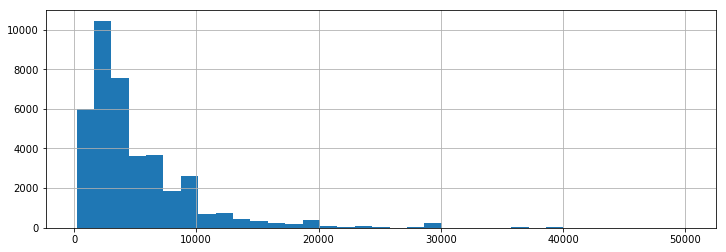

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
#data['Processing_Fee'].plot(figsize=(12,4))
data['Processing_Fee'].hist(bins=35,figsize=(12,4))

In [34]:
data['Processing_Fee_Missing']=data['Processing_Fee'].apply(lambda x:1 if pd.isnull(x) else 0)   
#将缺失值比较多的变量衍生出新的的变量 0、1

In [35]:
data['Processing_Fee_Missing'].value_counts()

1    85346
0    39391
Name: Processing_Fee_Missing, dtype: int64

In [36]:
data.drop('Processing_Fee',axis=1,inplace=True)

In [37]:
data['LoggedIn'].value_counts()     #  0,1变量，缺失比例较大，考虑删除

0.0    84466
1.0     2554
Name: LoggedIn, dtype: int64

In [38]:
np.sum(data['LoggedIn'].isnull())    

37717

In [39]:
data.drop('LoggedIn',axis=1,inplace=True)

In [40]:
np.sum(data['Loan_Amount_Submitted'].isnull())

49535

In [41]:
data['Loan_Amount_Submitted'].value_counts().head()

100000.0     9916
200000.0     9475
300000.0     7730
500000.0     6901
1000000.0    2355
Name: Loan_Amount_Submitted, dtype: int64

In [42]:
data['Loan_Amount_Submitted_Missing']=data['Loan_Amount_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data.drop('Loan_Amount_Submitted',axis=1,inplace=True)      #变量缺失过多，原变量删除，衍生新变量

In [43]:
np.sum(data['Loan_Tenure_Submitted'].isnull())

49535

In [44]:
data['Loan_Tenure_Submitted'].value_counts().head()

5.0    29803
4.0    21820
3.0    12734
2.0     7580
1.0     3259
Name: Loan_Tenure_Submitted, dtype: int64

In [45]:
data['Loan_Tenure_Submitted_Missing']=data['Loan_Tenure_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data.drop('Loan_Tenure_Submitted',axis=1,inplace=True)    #变量缺失过多，删除，并衍生新变量

In [46]:
np.sum(data['EMI_Loan_Submitted'].isnull())

84901

In [47]:
data['EMI_Loan_Submitted'].value_counts().head()

3716.36    418
7948.17    354
5089.58    351
5298.78    346
8742.98    324
Name: EMI_Loan_Submitted, dtype: int64

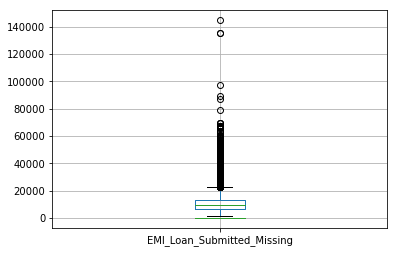

In [48]:
data['EMI_Loan_Submitted_Missing']=data['EMI_Loan_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data.boxplot(column='EMI_Loan_Submitted',return_type='axes')
data.boxplot(column='EMI_Loan_Submitted_Missing',return_type='axes')
plt.show()                                   

In [49]:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [50]:
np.sum(data['Interest_Rate'].isnull())

84901

In [51]:
data['Interest_Rate_Missing']=data['Interest_Rate'].apply(lambda x:1 if pd.isnull(x) else 0)

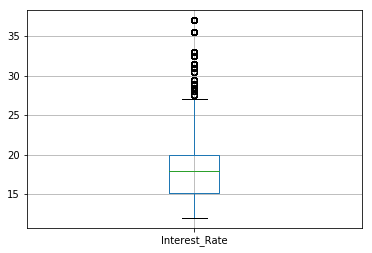

In [52]:
data.boxplot(column='Interest_Rate',return_type='dict')
plt.show()

In [53]:
data.drop('Interest_Rate',axis=1,inplace=True)

In [54]:
data['Disbursed'].value_counts()      #如何处理

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

In [55]:
np.sum(data['Disbursed'].isnull())

37717

In [56]:
data['Existing_EMI'].value_counts().head()

0.0        83452
5000.0      3806
10000.0     2516
3000.0      2195
4000.0      1780
Name: Existing_EMI, dtype: int64

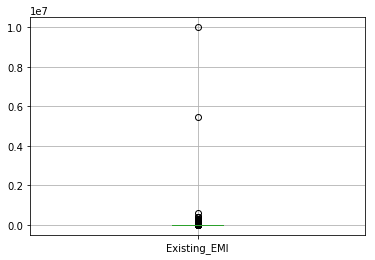

In [57]:
data.boxplot('Existing_EMI',return_type='axes')
plt.show()

In [58]:
np.sum(data['Existing_EMI'].isnull())

111

In [59]:
data['Existing_EMI'].fillna(0,inplace=True)          #缺失值不多的非0，1变量，补0

In [60]:
np.sum(data['Existing_EMI'].isnull())

0

In [61]:
list=['Loan_Amount_Applied','Loan_Tenure_Applied']

In [62]:
data['Loan_Amount_Applied'].value_counts().head()

0.0         41314
100000.0    20627
200000.0    18705
300000.0    14334
500000.0    13905
Name: Loan_Amount_Applied, dtype: int64

In [63]:
np.sum(data['Loan_Amount_Applied'].isnull())

111

In [64]:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)    #数值少量缺失值，使用中位数补缺

In [65]:
np.sum(data['Loan_Amount_Applied'].isnull()),np.sum(data['Loan_Tenure_Applied'].isnull())

(0, 0)

#处置后的缺失值变量统计

In [66]:
data.apply(lambda x: sum(x.isnull())).head()

Disbursed              37717
Existing_EMI               0
ID                         0
Loan_Amount_Applied        0
Loan_Tenure_Applied        0
dtype: int64

In [67]:
data['merge'].value_counts()

train    87020
test     37717
Name: merge, dtype: int64

In [68]:
train=data[data['merge']=='train']
test=data[data['merge']=='test']
train.shape,test.shape

((87020, 83), (37717, 83))

In [69]:
train.drop('merge',axis=1,inplace=True)
test.drop(['merge','Disbursed'],axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
train.shape,test.shape   #处理之后的变量

((87020, 82), (37717, 81))

In [71]:
train.apply(lambda x: np.sum(pd.isnull(x)))

Disbursed                        0
Existing_EMI                     0
ID                               0
Loan_Amount_Applied              0
Loan_Tenure_Applied              0
Monthly_Income                   0
Var4                             0
Var5                             0
Age                              0
Var1_0                           0
Var1_1                           0
Var1_2                           0
Var1_3                           0
Var1_4                           0
Var1_5                           0
Var1_6                           0
Var1_7                           0
Var1_8                           0
Var1_9                           0
Var1_10                          0
Var1_11                          0
Var1_12                          0
Var1_13                          0
Var1_14                          0
Var1_15                          0
Var1_16                          0
Var1_17                          0
Var1_18                          0
Var2_0              

In [72]:
test.apply(lambda x: sum(x.isnull()))

Existing_EMI                     0
ID                               0
Loan_Amount_Applied              0
Loan_Tenure_Applied              0
Monthly_Income                   0
Var4                             0
Var5                             0
Age                              0
Var1_0                           0
Var1_1                           0
Var1_2                           0
Var1_3                           0
Var1_4                           0
Var1_5                           0
Var1_6                           0
Var1_7                           0
Var1_8                           0
Var1_9                           0
Var1_10                          0
Var1_11                          0
Var1_12                          0
Var1_13                          0
Var1_14                          0
Var1_15                          0
Var1_16                          0
Var1_17                          0
Var1_18                          0
Var2_0                           0
Var2_1              

In [73]:
train.to_csv('train_gai.csv',index=False)
test.to_csv('test_gai.csv',index=False)

# train:26->82;test:24->81.变量维度增加，